In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('../../Dataset/Palladium.csv')
df.shape

(1687, 5)

In [3]:
# Kiểm tra cột close có hàng nào null không
df['Close'].isnull().sum()

0

In [4]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

# Sắp xếp lại index
df = df.sort_index(ascending=True)
df = df.drop(columns=['Open', 'High', 'Low'])
df

,Close
Date,
2019-03-01,1551.5
2019-03-03,1549.5
2019-03-04,1535.5
2019-03-05,1514.5
2019-03-06,1535.0
...,...
2024-03-22,992.5
2024-03-23,992.5
2024-03-24,984.0


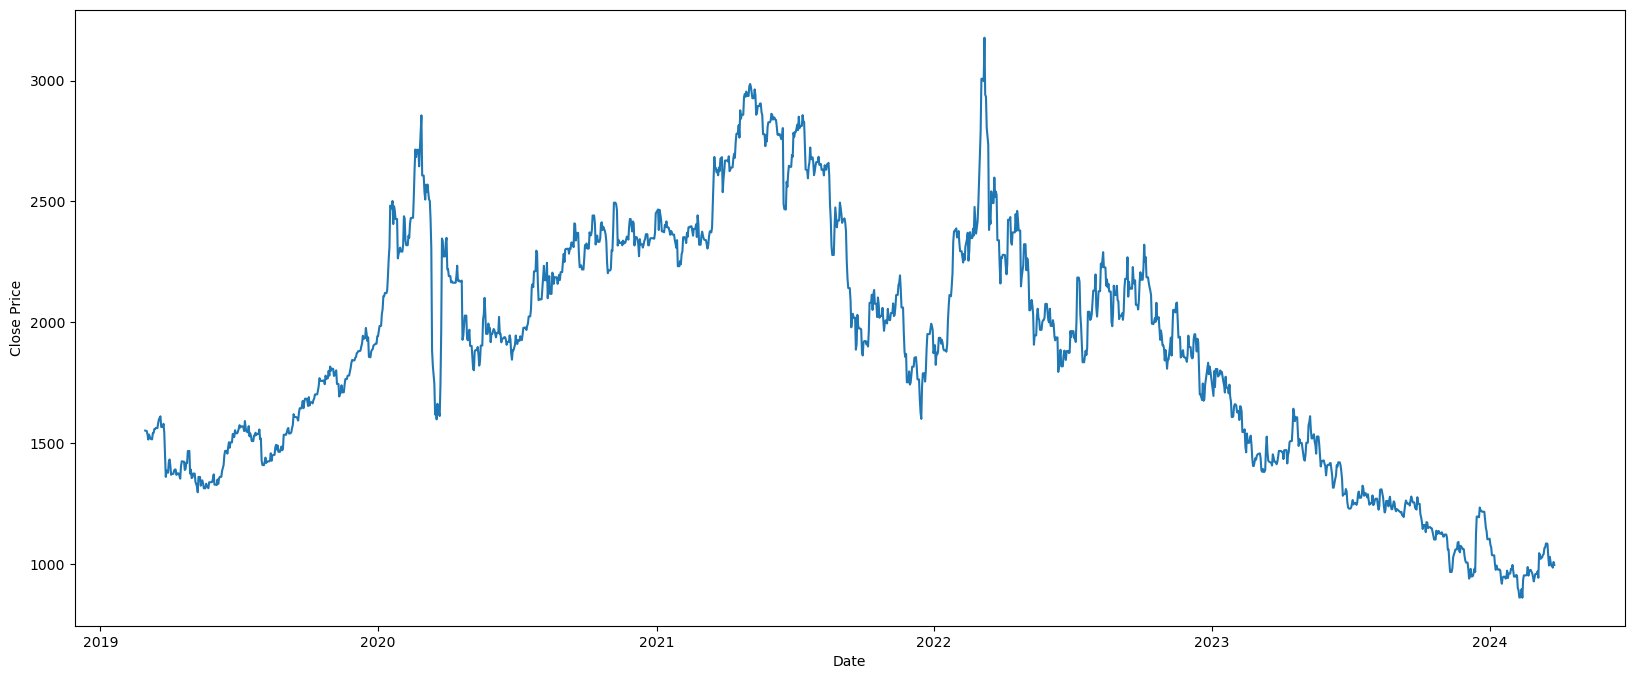

In [5]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [6]:
# Chia train test theo tỉ lệ
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [7]:
# Chia các tập x,y train, test tương ứng
x_train = np.array(train_data.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(train_data['Close']) #Lấy dữ liệu giá Close

x_test = np.array(test_data.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(test_data['Close']) #Lấy dữ liệu giá Close

In [8]:
# Quá trình training
# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10799.699, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10809.215, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10801.656, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10802.880, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10807.451, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10799.245, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10799.179, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10800.507, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10800.218, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10801.235, Time=0.99 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10797.347, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10801.077, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10797.416, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=10798.684, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# Tóm tắt model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1012
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -5395.673
Date:                Thu, 30 May 2024   AIC                          10797.347
Time:                        16:31:43   BIC                          10812.103
Sample:                             0   HQIC                         10802.952
                               - 1012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0947      0.023      4.196      0.000       0.050       0.139
ma.L2          0.0710      0.027      2.668      0.008       0.019       0.123
sigma2      2530.0963     47.343     53.442      0.000    2437.306    2622.886
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6965.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# Quá trình testing 
y_pred = model.predict(n_periods=len(x_test))

In [11]:
# Tính MSE - Mean Squared Error - Sai số bình phương trung bình
test_mse = mean_squared_error(y_test, y_pred) 
print('Testing MSE:', test_mse)

# Tính RMSE - Root Mean Squared Error - Sai số bình phương trung bình
test_rmse = math.sqrt(test_mse)
print('Testing RMSE:', test_rmse)

# Tính MAPE - Mean Absolute Percentage Error - Tỷ lệ phần trăm sai số tuyệt đối trung bình
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing MSE: 768332.9108921731
Testing RMSE: 876.5460118511595
Testing MAPE: 0.6169524433111719


Giá Close dự đoán:
[2324.75472116 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256]


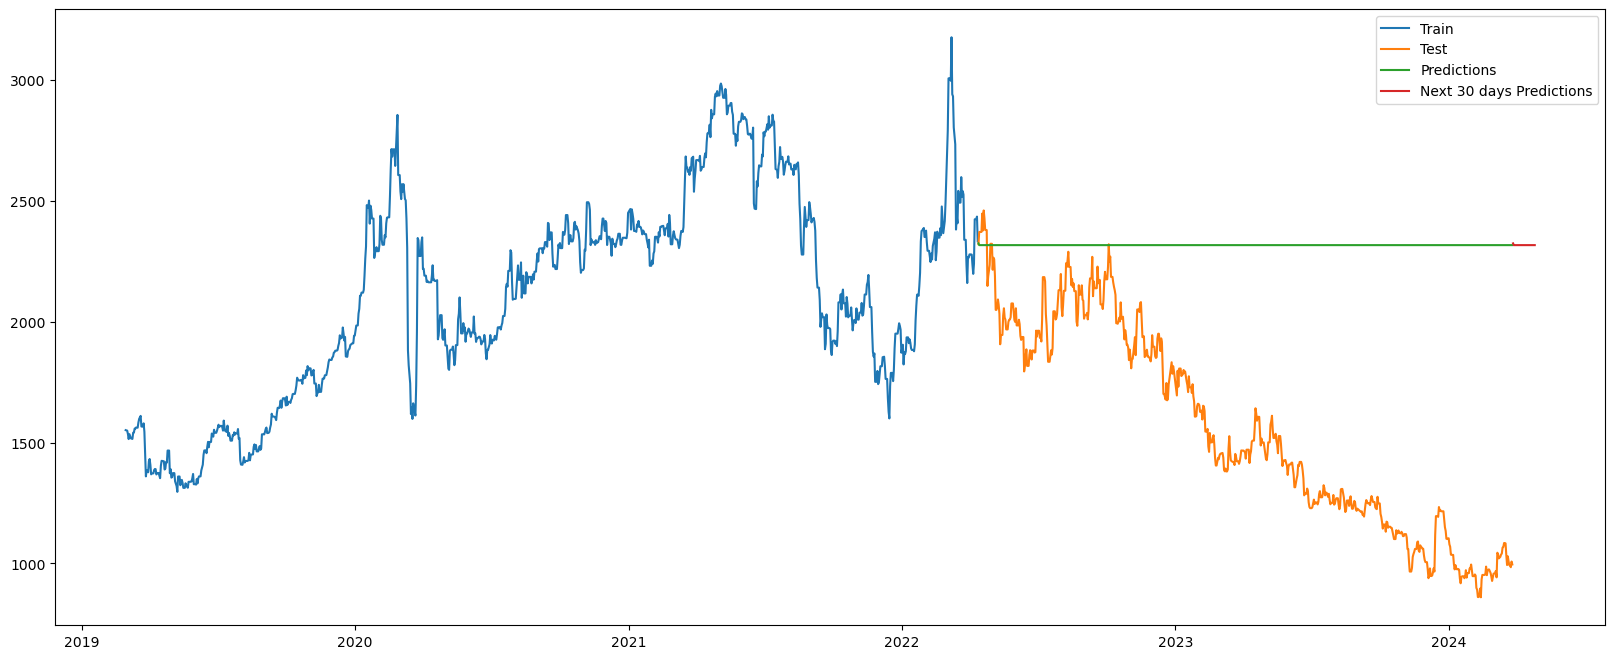

In [12]:
# Dự đoán 30 ngày
predict_days = 30

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 30 days Predictions'])
plt.show()

Giá Close dự đoán:
[2324.75472116 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256]


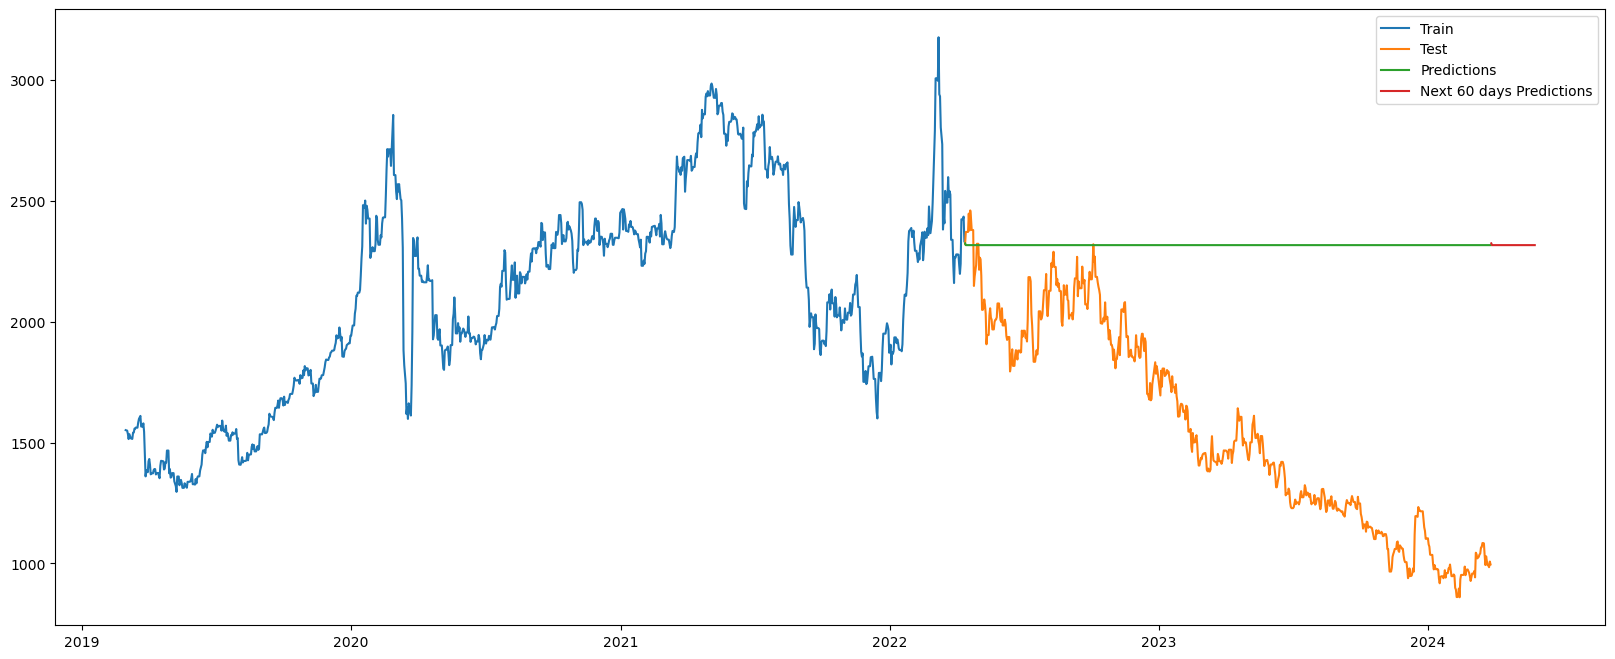

In [13]:
# Dự đoán 60 ngày
predict_days = 60

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 60 days Predictions'])
plt.show()

Giá Close dự đoán:
[2324.75472116 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2317.48096256
 2317.48096256 2317.48096256 2317.48096256 2317.48096256 2

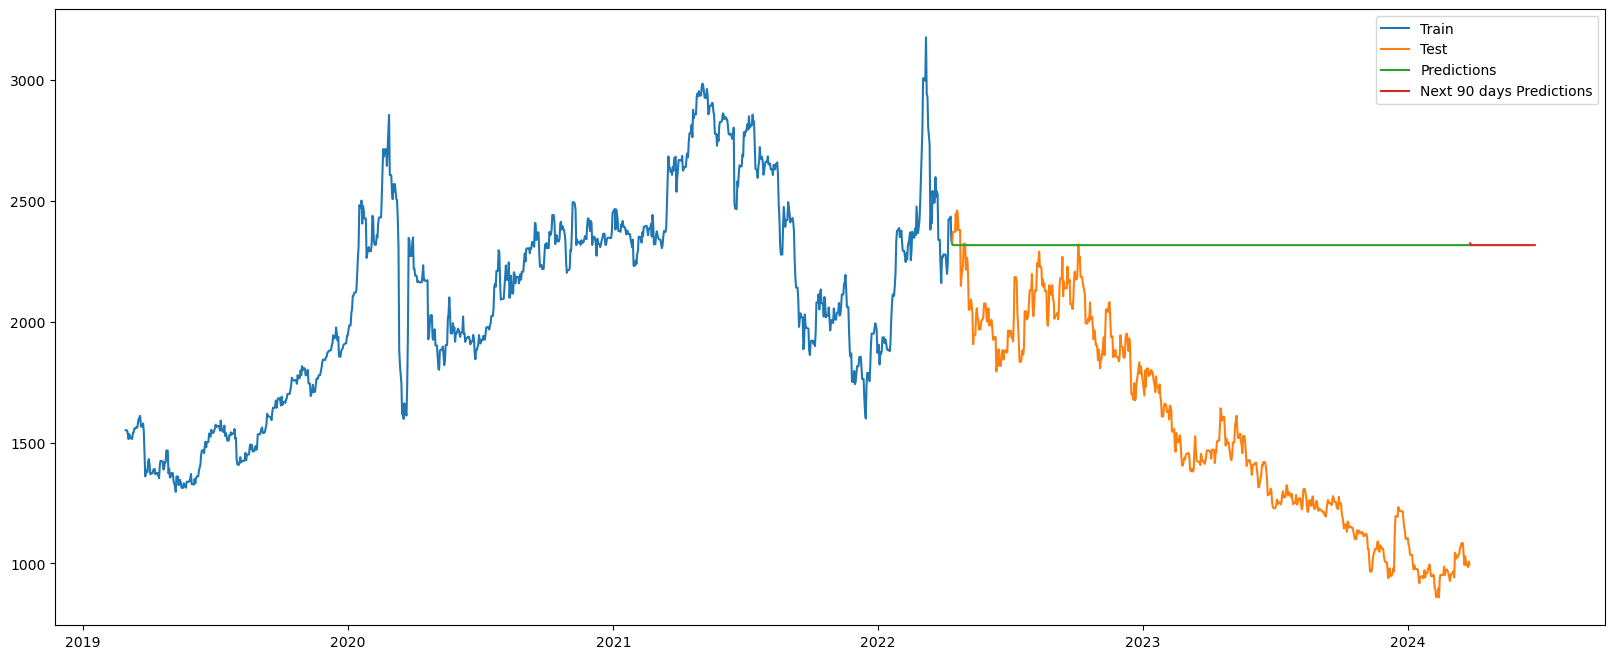

In [14]:
# Dự đoán 90 ngày
predict_days = 90

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions'])
plt.show()